<a href="https://colab.research.google.com/github/handsomekiwi/JupyterPractice/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras 

Using TensorFlow backend.


In [0]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [0]:
%matplotlib inline
import numpy as np
# matplotlib.pyplot provide a MATLAB_like way of plotting
import matplotlib.pyplot as plt 

In [0]:
from keras.datasets  import mnist

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [0]:
len(x_train)

60000

In [0]:
x_train[9487].shape


(28, 28)

2.2 輸入格式整理
如果你還記得, 我們每筆輸入資料都是 28x28 的陣列, CNN 其實就是吃「圖」的, 所以基本上不用像之前把每筆資料拉平。「但。是。」平常的圖都有 R, G, B 三個 channels, 每個 channel 都是一個矩陣, 也就是一張圖可能是三個矩陣! 我們是灰階, 也就是只有一個 channel。但這件事也要明確的告訴 Keras。

換句話說, 我們的輸入每筆資料型式要從 (28, 28) 換成 (28, 28, 1)!

In [0]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)


In [0]:
x_train[9487].shape

(28, 28, 1)

In [0]:
X=x_train[9487][:,:,0]

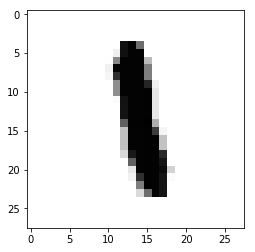

In [0]:
plt.imshow(X,cmap='Greys')


2.3輸出格式整理

和上次一樣，我們用標準1-hot方式處理

In [0]:
from keras.utils import np_utils

In [0]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

## 3.打造你的CNN
3.1 決定神經網路架構，讀入相關套件
CNN我們一樣要決定用幾層的CNN、然後是不是每次都要做MAX-pooling，再來就是拉平、送入標準神經網路<br />
做3次convolution,每次都接max-pooling<br />
filter大小都是3乘3,max-pooling都用2乘2為一小區塊<br />
CNN一個小技巧是每層的FILTERS數目是越來越多。做完convolution之後，我們要拉平，再送入一個標準的神經網路，這個神經網路設計是這樣:
只有1個hidden layer,使用200個神經元


In [0]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD

In [0]:
model = Sequential()

W0816 17:56:31.201586  7428 deprecation_wrapper.py:119] From C:\Users\kiwi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
model.add(Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))

W0816 17:56:31.615479  7428 deprecation_wrapper.py:119] From C:\Users\kiwi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 17:56:31.868829  7428 deprecation_wrapper.py:119] From C:\Users\kiwi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



padding =same指的是conv2d後輸出還是28*28 32個kernel

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

W0816 17:56:31.990475  7428 deprecation_wrapper.py:119] From C:\Users\kiwi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
#input_shape不用 kernal會越來越多(經驗法則)
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
#送到dense以前要拉成一維的向量
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [0]:
model.add(Dense(10))
model.add(Activation('softmax'))

3. 改變 loss function
大家記得 loss function 就是看我們和目標差多遠。我們最常用的「平均平方差」並不一定是唯一、甚至「最好」的。分類問題我們更常用 "categorical crossentropy", 在 Keras 中要使用很方便, 就這樣下指令:

In [0]:
model.compile(loss='mse',optimizer=SGD(lr=0.05),metrics=['accuracy'])

W0816 17:56:32.875817  7428 deprecation_wrapper.py:119] From C:\Users\kiwi\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



檢視我們的神經網路

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [0]:
#320
(3*3+1)*32

320

In [0]:
model.fit(x_train,y_train,batch_size=100,epochs=20)

W0816 17:56:34.290144  7428 deprecation_wrapper.py:119] From C:\Users\kiwi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0816 17:56:34.337018  7428 deprecation_wrapper.py:119] From C:\Users\kiwi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/20
60000/60000 [==============================] - 26s 440us/step - loss: 0.1564 - acc: 0.1911
Epoch 2/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0095 - acc: 0.9366
Epoch 3/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0044 - acc: 0.9718
Epoch 4/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0031 - acc: 0.9800
Epoch 5/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0026 - acc: 0.9839
Epoch 6/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0021 - acc: 0.9868
Epoch 7/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0018 - acc: 0.9891
Epoch 8/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0015 - acc: 0.9906
Epoch 9/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0013 - acc: 0.9922
Epoch 10/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0011 - acc: 0.99

CNN為classification tasks，因此有global min value 和local min value的問題

5.結果測試


In [0]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 81us/step


In [0]:
print('loss: ', score[0])#看loss不能看出甚麼東西
print('accuracy', score[1])

loss:  0.0019663327919444474
accuracy 0.9876


In [0]:
model_json = model.to_json()
open('handwriting_model_cnn.json', 'w').write(model_json)
model.save_weights('handwritin_model-cnn.h5')

我們用另一個方式: 每次選 5 個顯示, 看是不是有正確辨識。

In [0]:
predict = model.predict_classes(x_test)

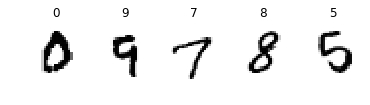

In [0]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")